# **Visualização: Balanço Patrimonial e Preço**

In [ ]:
# Balanço patrimonial BPA_con

from pandas import read_csv

df_BPA_klbn = read_csv(r"Q:\financial_data_pipelines\data\pipelines\formulario_informacoes_trimestrais\interim\itr_cia_aberta_BPA_con_2011-2025.csv")
df_BPA_klbn.tail(3)

# Selecionando dados de uma empresa especifica
cnpj_klbn4 = "89.637.490/0001-45"

df_BPA_klbn = df_BPA_klbn[df_BPA_klbn["CNPJ_CIA"] == cnpj_klbn4]

# Selecionando informação atualizada
df_BPA_klbn = df_BPA_klbn[df_BPA_klbn["ORDEM_EXERC"] == "ÚLTIMO"]

df_BPA_klbn = df_BPA_klbn[df_BPA_klbn["CD_CONTA"] == "1"]

df_BPA_klbn.tail(3)

,DT_REFER,DENOM_CIA,CNPJ_CIA,VERSAO,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
2165743,2025-03-31,KLABIN S.A.,89.637.490/0001-45,1,ÚLTIMO,2025-03-31,1,Ativo Total,57473164.0,S
2165877,2025-06-30,KLABIN S.A.,89.637.490/0001-45,1,ÚLTIMO,2025-06-30,1,Ativo Total,60335243.0,S
2166012,2025-09-30,KLABIN S.A.,89.637.490/0001-45,1,ÚLTIMO,2025-09-30,1,Ativo Total,62163679.0,S


In [17]:
# Série temporal yfinance

from yfinance import download
df_serie = download("KLBN4.SA", start="2011-03-31", auto_adjust=False, progress=False)
df_serie = df_serie.droplevel(1, axis=1)
df_serie.reset_index(inplace=True)
df_serie.tail(3)

Price,Date,Adj Close,Close,High,Low,Open,Volume
3634,2025-11-11,3.59,3.59,3.61,3.55,3.60,4255200
3635,2025-11-12,3.68,3.68,3.68,3.57,3.61,3795500
3636,2025-11-13,3.60,3.60,3.70,3.59,3.67,3278700


In [18]:
df_itr_con_copy = df_BPA_klbn[["DT_REFER", "VL_CONTA"]]
lista = []

cont_ativo_total = 0
for date, adj_close in df_serie[["Date", "Adj Close"]].values:

    dt_serie = str(date)[:7]
    
    # print(dt_serie)
    
    for dt_refer, vl_conta in df_BPA_klbn[["DT_REFER", "VL_CONTA"]].values:
        dt_refer = dt_refer[:7]

        # print(dt_refer)

        if dt_serie == dt_refer:

            value = vl_conta

    lista.append(value)

print(len(lista))

3637


In [19]:
df_serie['Ativo Total'] = lista

In [20]:
df_serie.tail(3)

Price,Date,Adj Close,Close,High,Low,Open,Volume,Ativo Total
3634,2025-11-11,3.59,3.59,3.61,3.55,3.60,4255200,62163679.0
3635,2025-11-12,3.68,3.68,3.68,3.57,3.61,3795500,62163679.0
3636,2025-11-13,3.60,3.60,3.70,3.59,3.67,3278700,62163679.0


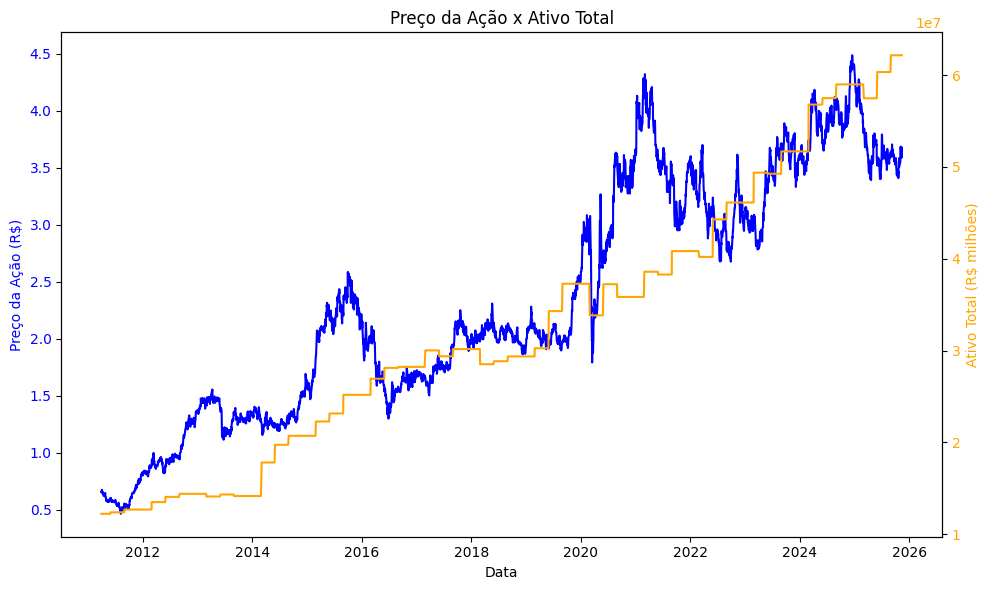

In [23]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Série 1 (ex: preço da ação)
ax1.plot(df_serie["Date"], df_serie["Adj Close"], color="blue", label="Preço (Adj Close)")
ax1.set_ylabel("Preço da Ação (R$)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Cria um segundo eixo Y (compartilha o eixo X)
ax2 = ax1.twinx()

# Série 2 (ex: receita)
ax2.plot(df_serie["Date"], df_serie["Ativo Total"], color="orange", label="Ativo Total")
ax2.set_ylabel("Ativo Total (R$ milhões)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Ajustes gerais
ax1.set_xlabel("Data")
plt.title("Preço da Ação x Ativo Total")
fig.tight_layout()

plt.show()
